
# Project work on Intelligent system
# Comparison between DeepNNs for Transprecision computing (part 1) 
#### Enrico Damini A.Y. 2017/18
# _
### Architecture: Fully Connected
### Precision: float32
### Labels: y_i-th 


# Loading data

A dataset, called OpPlus.h5, has been generated throught a dataset generator (opgen.py). 
I've generated many different datasets by changing some parameters, one of them id the number of iterations. In this case is 3. 

In [1]:
import pandas as pd

iterations = 3
path = "/Users/enricodamini/Desktop/data_iter"+str(iterations)+"/OpPlus.h5"
data = pd.read_hdf(path)
data.head()

,type,iter,in0,in1,y_0,y_1,y_2,y_3,y_4,y_5,...,e_55,e_56,e_57,e_58,e_59,e_60,e_61,e_62,e_63,e_64
0,float16,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,float16,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,float16,1,0,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,float16,1,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,float16,1,0,4,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing 

## Shuffling and Splitting
Basically, the training-set refers to the samples with the attribute "iter" equal to 1, while the test-set refers to the sample with the attribute "iter" equal to "iterations" (in this case 2).
By setting the "random_state" paramter, in the "sklearn.model_selection.train_test_slpit" input, we are able to use the same samples (that are not use for the training) and, in the same time, considering just the samples with iter equal to 2.  

In [2]:
from sklearn.model_selection import train_test_split

data = data.loc[data['type']=='float32']
data_train= data.loc[data['iter']==1]
data_test = data.loc[data['iter']==iterations]

train_samples,_ = train_test_split(data_train.loc[:,'in0':'y_64'], test_size=0.333,random_state=4955)
_,test_samples = train_test_split(data_test.loc[:,'in0':'y_64'], test_size=0.333,random_state=4955)

in_test = test_samples.loc[:,['in0','in1']]
y_test =  test_samples.loc[:,'y_0':'y_64']

in_train = train_samples.loc[:,['in0','in1']] 
y_train =  train_samples.loc[:,'y_0':'y_64']

In [3]:
print(data.shape, train_samples.shape,test_samples.shape)
print(in_train.shape,y_train.shape)

(12675, 134) (2818, 67) (1407, 67)
(2818, 2) (2818, 65)


## Creating an one-hot encoding of the input

Transforming one input at a time and aggregating them together.

This is done because the network can work better by using a one-hot reppresentation, instead of using integers. As you'll see it can achieve better performance. 

In [4]:
from keras.utils import to_categorical

#train
in_0= to_categorical(in_train.loc[:,'in0'])
in_1= to_categorical(in_train.loc[:,'in1'])

#test
in_0_test= to_categorical(in_test.loc[:,'in0'])
in_1_test= to_categorical(in_test.loc[:,'in1'])


/anaconda2/envs/py3k/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
print(in_0.shape)
in_0

(2818, 65)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

After having one-hot encoded the input, it is necessary to aggregate them together in order to have "(130,1)" as the input shape. 

In [6]:
import numpy as np

input_01 = np.append(in_0,in_1,axis=1)
input_01_test = np.append(in_0_test,in_1_test,axis=1)

print(input_01.shape)
input_01

(2818, 130)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Normalizing  y_i

It is better to normalize the labels, patterns can be better recognized. 

In [7]:
y_train = y_train / 100
y_test = y_test / 100

In [8]:
y_train

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,...,y_55,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64
12675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
16462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
15799,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
15072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# Building the model

In [9]:
input_shape = (130,1) 

In [10]:
in_01_reshaped = input_01.reshape((-1,130,1))
in_01_reshaped_test = input_01_test.reshape((-1,130,1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

n_classes = 65 

model = Sequential(name="Fully Connected")
model.add(Flatten(input_shape=input_shape))
model.add(Dense(130, activation='relu'))
model.add(Dense(260, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(n_classes, activation='softmax'))

In [12]:
from keras import metrics,optimizers

model.compile( loss='categorical_crossentropy',#optimizer='rmsprop',
              optimizer=optimizers.Adam(lr=0.001),
              metrics= [metrics.categorical_accuracy,metrics.mean_absolute_error]) 

In [13]:
%time model.fit(in_01_reshaped, y_train.values,epochs=100,verbose=1)

Epoch 1/100
2818/2818 [==============================] - 1s 211us/step - loss: 4.0066 - categorical_accuracy: 0.0859 - mean_absolute_error: 0.0302
Epoch 2/100
2818/2818 [==============================] - 0s 131us/step - loss: 3.2910 - categorical_accuracy: 0.3041 - mean_absolute_error: 0.0289
Epoch 3/100
2818/2818 [==============================] - 0s 128us/step - loss: 2.1639 - categorical_accuracy: 0.6047 - mean_absolute_error: 0.0237
Epoch 4/100
2818/2818 [==============================] - 0s 126us/step - loss: 1.3162 - categorical_accuracy: 0.7626 - mean_absolute_error: 0.0166
Epoch 5/100
2818/2818 [==============================] - 0s 133us/step - loss: 0.9397 - categorical_accuracy: 0.8314 - mean_absolute_error: 0.01270s - loss: 0.9992 - categorical_accuracy: 0.8206 - mean_absolute_e
Epoch 6/100
2818/2818 [==============================] - 0s 112us/step - loss: 0.7174 - categorical_accuracy: 0.8673 - mean_absolute_error: 0.0102
Epoch 7/100
2818/2818 [=============================

2818/2818 [==============================] - 0s 80us/step - loss: 0.1059 - categorical_accuracy: 0.9780 - mean_absolute_error: 0.0013
Epoch 57/100
2818/2818 [==============================] - 0s 79us/step - loss: 0.1049 - categorical_accuracy: 0.9759 - mean_absolute_error: 0.0012
Epoch 58/100
2818/2818 [==============================] - 0s 79us/step - loss: 0.1041 - categorical_accuracy: 0.9748 - mean_absolute_error: 0.0012
Epoch 59/100
2818/2818 [==============================] - 0s 79us/step - loss: 0.1004 - categorical_accuracy: 0.9794 - mean_absolute_error: 0.0012
Epoch 60/100
2818/2818 [==============================] - 0s 78us/step - loss: 0.1029 - categorical_accuracy: 0.9787 - mean_absolute_error: 0.0012
Epoch 61/100
2818/2818 [==============================] - 0s 82us/step - loss: 0.1015 - categorical_accuracy: 0.9762 - mean_absolute_error: 0.0011
Epoch 62/100
2818/2818 [==============================] - 0s 79us/step - loss: 0.0951 - categorical_accuracy: 0.9798 - mean_absolut

In [14]:
score_train = model.evaluate(in_01_reshaped, y_train.values,
                             verbose=0)
score_test = model.evaluate(in_01_reshaped_test, y_test.values,
                            verbose=0)
print(str(model.metrics_names[1]) + ' on the training set: %f' % score_train[1])
print(str(model.metrics_names[1])+ ' on the test set: %f' % score_test[1])
print(str(model.metrics_names[2]) + ' on the training set: %f' % score_train[2])
print(str(model.metrics_names[2])+ ' on the test set: %f' % score_test[2])

categorical_accuracy on the training set: 0.984031
categorical_accuracy on the test set: 0.958067
mean_absolute_error on the training set: 0.000276
mean_absolute_error on the test set: 0.001448


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 130)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 130)               17030     
_________________________________________________________________
dense_2 (Dense)              (None, 260)               34060     
_________________________________________________________________
dropout_1 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 65)                16965     
Total params: 68,055
Trainable params: 68,055
Non-trainable params: 0
_________________________________________________________________


# Example

In [16]:
n= 266
X= in_01_reshaped_test[n].reshape(1,130,1)
predictions = model.predict(X)
predictions = predictions.reshape((65,))
print(in_test.iloc[[n]])
print("\nLabel: \n")
print(y_test.values[n])
print("\nPredicted: \n")
print(predictions)


      in0 in1
23621  38  26

Label: 

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.68 0.06
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Predicted: 

[5.2677135e-10 6.6278960e-09 1.9099057e-08 1.9215454e-06 6.5567448e-08
 3.1632833e-08 3.2515445e-11 1.0968784e-10 2.6015794e-08 3.3584380e-09
 1.4968614e-07 3.3148712e-08 6.3830832e-08 1.5724178e-09 3.4219451e-07
 1.6079184e-08 1.7521307e-07 1.0988438e-08 9.2641761e-09 2.1954376e-07
 6.7112187e-09 7.4933240e-08 6.5290811e-07 9.2676182e-06 2.9205109e-04
 1.6911121e-01 3.3759183e-01 1.9207358e-04 6.4843682e-08 5.3679252e-09
 2.6355618e-08 7.0893016e-08 2.8040255e-09 1.4768132e-07 7.7727357e-08
 1.1740734e-09 1.5549769e-08 2.4412408e-05 4.9157780e-01 1.0247545e-03
 1.4411929e-04 2.5554500e-05 4.3034419e-07 4.4438605e-0

Label:


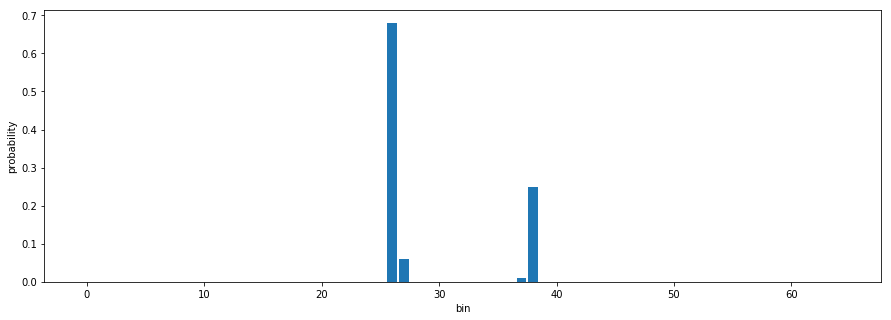

Predicted:


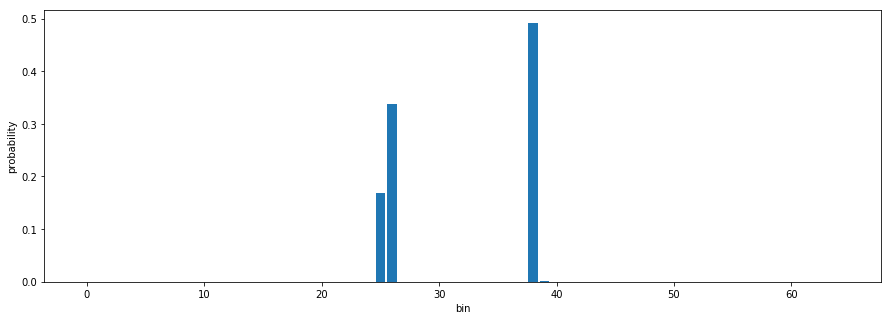

In [18]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

print("Label:")
plt.figure(figsize=(15,5))
plt.bar(np.arange(65), y_test.values[n],align='center')
plt.ylabel('probability')
plt.xlabel('bin')
plt.show()

print("Predicted:")
plt.figure(figsize=(15,5))
plt.bar(np.arange(65),predictions,align='center')
plt.ylabel('probability')
plt.xlabel('bin')
plt.show()